In [30]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


## set a global cmap: 'cool' ,   'twilight_shifted', 'hsv', 'jet'
plt.rcParams['image.cmap']='cool'

## plot_surface - suitable only for surfaces, not full figures

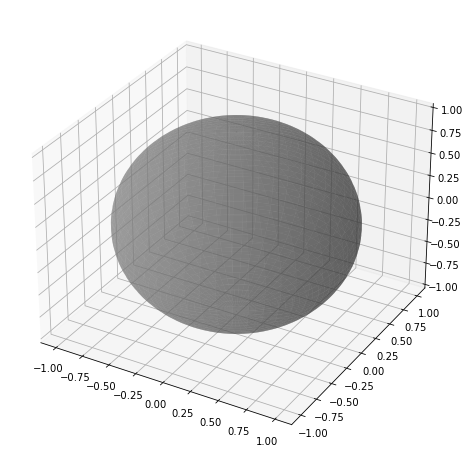

In [3]:
fig = plt.figure( figsize = (8, 10))
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = R * np.outer(np.cos(u), np.sin(v))
y = R * np.outer(np.sin(u), np.sin(v))
z = R * np.outer(np.ones(np.size(u)), np.cos(v))


# Plot the surface
ax.plot_surface(x, y, z, color='gray', alpha = 0.5)

plt.show()

## scatter - suitable for surfaces and figures

(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


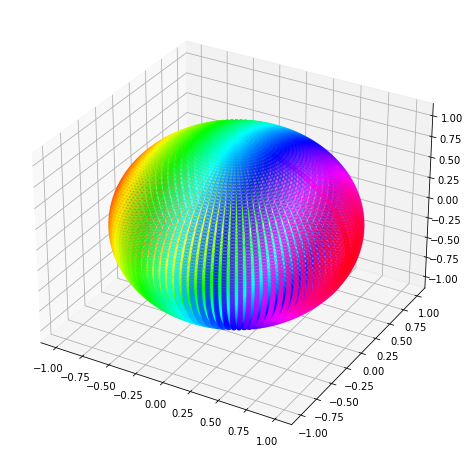

In [4]:
fig = plt.figure( figsize = (8, 10))
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = R * np.outer(np.cos(u), np.sin(v))
y = R * np.outer(np.sin(u), np.sin(v))
z = R * np.outer(np.ones(np.size(u)), np.cos(v))

color = x * 2

print(x.shape, y.shape, z.shape)

# Plot the surface
ax.scatter(x, y, z, c=color, alpha = 0.5)
print(x.shape, y.shape, z.shape)

plt.show()

# Creating a mesh grid for cartesian coordinates

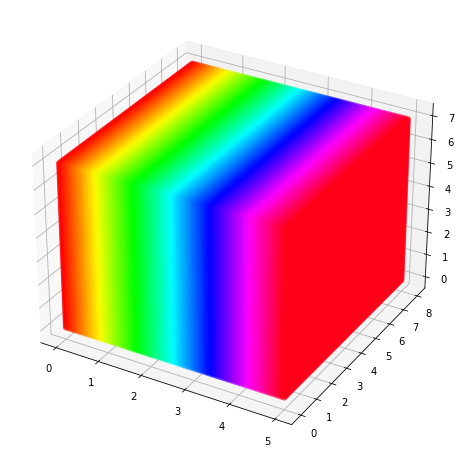

In [5]:
nx = 5
ny = 8
nz = 7

x = np.linspace(0, nx, 100)
y = np.linspace(0, ny, 100)
z = np.linspace(0, nz, 100)

X,Y,Z = np.meshgrid(x, y, z, indexing='ij')

color = X

fig = plt.figure( figsize = (8, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=color, alpha = 0.5)
plt.show()

# Creating a mesh grid for spherical coordinates

In [6]:
N = 30
r_max = 1

r = np.linspace(0, r_max, N)
θ = np.linspace(0, np.pi, N)
φ = np.linspace(0, 2 * np.pi, N)


x = np.tensordot(np.cos(θ), np.sin(φ), axes = 0)
X = np.tensordot(r, x, axes = 0)

y = np.tensordot(np.sin(θ), np.sin(φ), axes = 0)
Y = np.tensordot(r, y, axes = 0)

z = np.tensordot(np.cos(θ)*0 +1, np.cos(φ), axes = 0)
Z = np.tensordot(r, z, axes = 0)

R,O,Φ = np.meshgrid(r, θ, φ, indexing='ij')

print(X.shape, Y.shape, Z.shape, R.shape, O.shape, Φ.shape)

(30, 30, 30) (30, 30, 30) (30, 30, 30) (30, 30, 30) (30, 30, 30) (30, 30, 30)


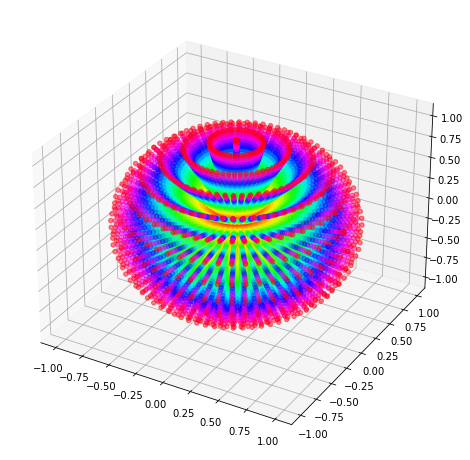

In [7]:
color = X**2 + Y**2 + Z**2

fig = plt.figure( figsize = (8, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X,Y,Z , c=color, alpha = 0.5)
plt.show()

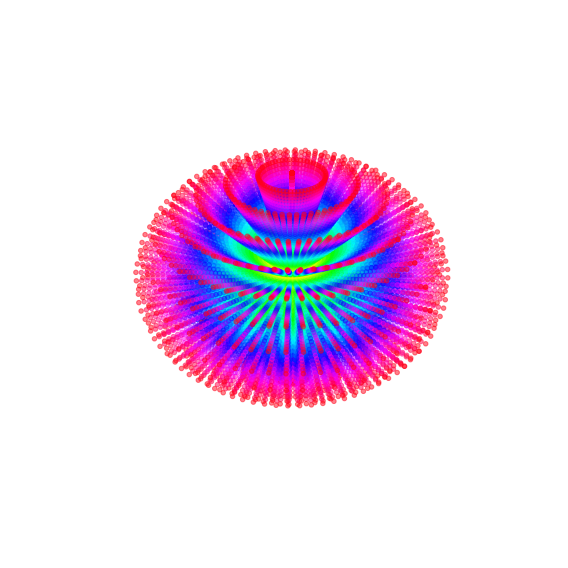

In [8]:
color = R

fig = plt.figure( figsize = (8, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z , c=color, alpha = 0.5)
ax.axis('off')
fig.tight_layout()    

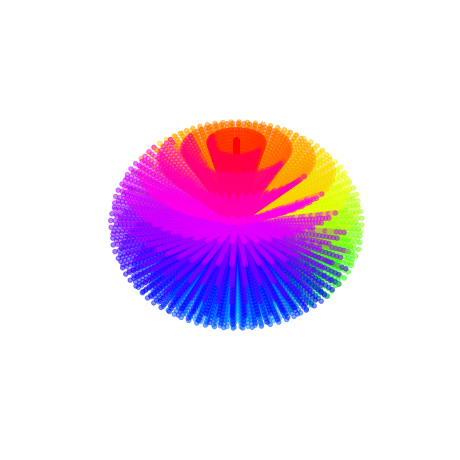

In [9]:
color = Φ

fig = plt.figure( figsize = (8, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X,Y,Z , c=color, alpha = 0.5)
ax.axis('off')
plt.show()

## For animation: rotation 
#for ii in range(0, 360, 1):
#    ax.view_init(elev=15., azim=ii)
#    fig.savefig("test_%d.png" % ii)

## Poisson:

$$\Delta V = \frac{\sigma}{\epsilon_0}$$

Solution: 
$V(r) = R \frac{\sigma}{\epsilon_0}$ 

$V(r) = R^2 \frac{\sigma}{\epsilon_0} \cdot \frac{1}{z}$

In [11]:
P =1
σ = 2
ε = 1

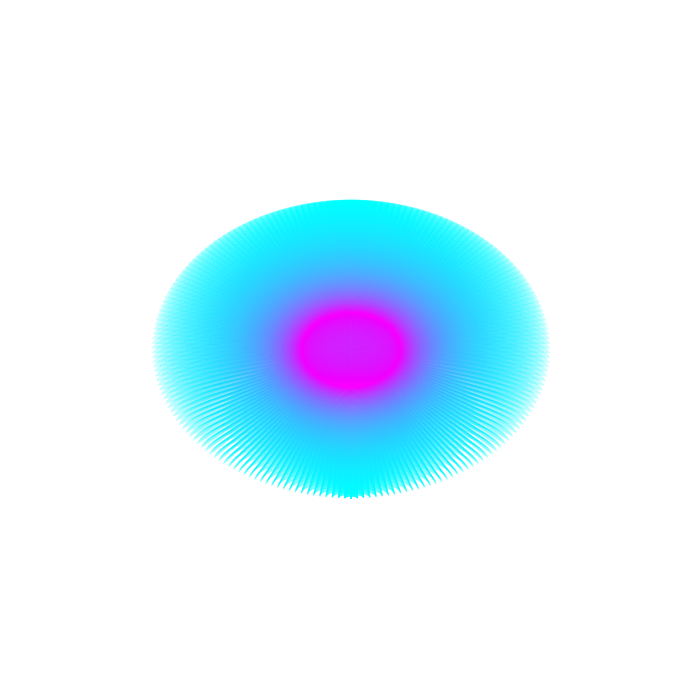

In [37]:
fig = plt.figure( figsize = (12, 15))
ax = fig.add_subplot(111, projection='3d')

N = 100
r_max = 4*P

θ = np.linspace(0, np.pi, N)
φ = np.linspace(0,  np.pi, N)


## inside
r_inside = np.linspace(0, P, N)
R_inside,O,Φ = np.meshgrid(r_inside, θ, φ, indexing='ij')


x = np.tensordot(np.cos(θ), np.sin(φ), axes = 0)
X_inside = np.tensordot(r_inside, x, axes = 0)

y = np.tensordot(np.sin(θ), np.sin(φ), axes = 0)
Y_inside = np.tensordot(r_inside, y, axes = 0)

z = np.tensordot(np.cos(θ)*0 +1, np.cos(φ), axes = 0)
Z_inside = np.tensordot(r_inside, z, axes = 0)

color_inside = (P*σ/ε) * (R_inside*0 +1)

ax.scatter(X_inside, Y_inside, Z_inside , c=color_inside, alpha = 0.5, s=0.05)



## outside

r_outside = np.linspace(P, r_max, N)
R_outside,O,Φ = np.meshgrid(r_outside, θ, φ, indexing='ij')


x = np.tensordot(np.cos(θ), np.sin(φ), axes = 0)
X_outside = np.tensordot(r_outside, x, axes = 0)

y = np.tensordot(np.sin(θ), np.sin(φ), axes = 0)
Y_outside = np.tensordot(r_outside, y, axes = 0)

z = np.tensordot(np.cos(θ)*0 +1, np.cos(φ), axes = 0)
Z_outside = np.tensordot(r_outside, z, axes = 0)

color_outside = P**2*σ/(ε * R_outside)

ax.scatter(X_outside, Y_outside, Z_outside , c=color_outside, alpha = 0.5, s=0.05)


ax.axis('off')
ax.view_init(elev=5, azim=270)

plt.show()

## For animation: rotation 
#for ii in range(0, 360, 1):
#    ax.view_init(elev=15., azim=ii)
#    fig.savefig("test_%d.png" % ii)